# Bly Practice

Ingesting features from Bly project, serialized to a geojson feature collection.

In [7]:
import json
import os

import matplotlib.pyplot as plt

In [8]:
with open('bly.geojson', 'r') as f:
    bly_features = json.load(f)

In [9]:
from hardhat.components.solarplant import Tracker, Table

In [10]:
bly_features['features'][1000]

{'type': 'Feature',
 'properties': {'terabase': {'id': '3a7a90bc-9f3c-462a-9bf5-5b80fd98ebeb',
   'x': None,
   'y': None,
   'table_type': 'Module Core Block 6MP type_3',
   'tracker_id': 'f0146b9a-5cc9-430f-9038-48f7f7351e82',
   'type': 'Table',
   'num_modules': 6}},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-121.02189742413552, 42.37790525920956],
    [-121.02187369778079, 42.37790525863459],
    [-121.0218736954541, 42.3779578135627],
    [-121.02189742182863, 42.377957814137666],
    [-121.02189742413552, 42.37790525920956]]]}}

In [11]:
from hardhat.gis.geojson import transformer_from_geom

In [12]:
to_utm, to_wgs = transformer_from_geom(bly_features['features'][0]['geometry'])

In [13]:
%%time
trackers = [Tracker.from_geojson(f, to_utm=to_utm, to_wgs=to_wgs) for f in bly_features['features'] if f['properties']['terabase']['type'] == 'Tracker']

CPU times: user 105 ms, sys: 13.1 ms, total: 118 ms
Wall time: 146 ms


We have zero tables and modules because we haven't associated any of those objects yet.

In [14]:
print(trackers[0])
print(trackers[0].num_tables, 'tables')
print(trackers[0].num_modules, 'modules')

134cb0d3-8125-4e71-afd5-c577b15b7dd0: (662818.985, 4693887.945)
0 tables
0 modules


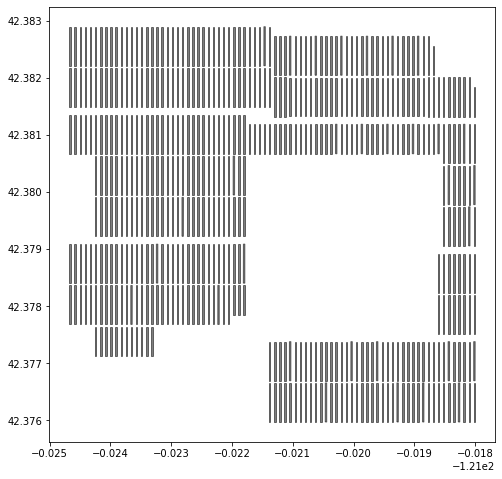

In [15]:
plt.figure(figsize=(8,8))
for t in trackers:
    t.plot(geom_kwargs={'fc':'black', 'alpha': 0.5})
    
plt.gca().autoscale()
#     plt.xlim(-121.03, -121.02)
#     plt.ylim(42.37, 42.38)

In [16]:
%%time
tables = [Table.from_geojson(f, to_utm=to_utm, to_wgs=to_wgs) for f in bly_features['features'] if f['properties']['terabase']['type'] == 'Table']

CPU times: user 1.17 s, sys: 53.6 ms, total: 1.22 s
Wall time: 1.26 s


But we do have info about the module counts of the tables...

In [ ]:
print(tables[0])
print(tables[0].num_modules)

80e436a7-32e6-4302-8bec-ff58d2bda6d8: (662612.736, 4694107.196)
6


Assign tables to trackers... really not that bad once the tables have been created.

In [ ]:
%%time

for tr in trackers:
    tr.assign_tables(tables)

CPU times: user 229 ms, sys: 2.3 ms, total: 232 ms
Wall time: 230 ms


Now we do have info about module and table counts for each tracker...

In [ ]:
print(trackers[0])
print(trackers[0].num_tables, 'tables')
print(trackers[0].num_modules, 'modules')

134cb0d3-8125-4e71-afd5-c577b15b7dd0: (662818.985, 4693887.945)
10 tables
72 modules


*SLOWWWWW* plotting for all the tables

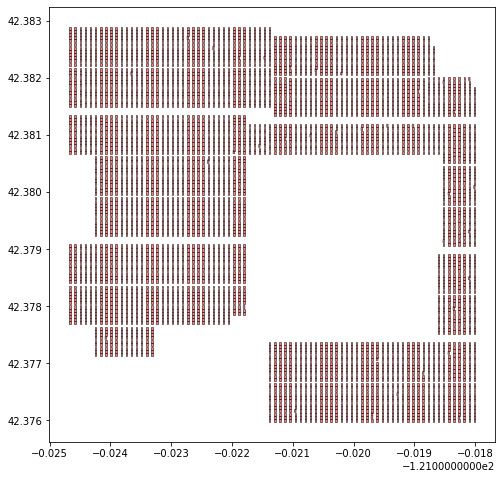

In [ ]:
plt.figure(figsize=(8,8))
for tab in tables:
    tab.plot(geom_kwargs={'fc': 'red', 'alpha': 0.5})
    
plt.gca().autoscale()